In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
import seaborn as sns

# Partia drugiego wyboru

## List of files

In [2]:
path = 'dane_pdf/analiza_elektoratu/'
files = list(filter(lambda x: os.path.isfile(path+x), os.listdir(path)))
files.sort()
files

['2001_06.csv',
 '2001_07.csv',
 '2004_02.csv',
 '2004_05.csv',
 '2005_06.csv',
 '2005_08.csv',
 '2007_02.csv',
 '2007_09.csv',
 '2009_05.csv',
 '2011_06.csv',
 '2011_07.csv',
 '2011_10.csv',
 '2011_11.csv',
 '2013_07.csv',
 '2015_08.csv',
 '2015_09.csv',
 '2017_04.csv',
 '2017_10.csv',
 '2019_03.csv',
 '2019_09.csv',
 '2019_10.csv']

### List of pandas DF

### Edit DF

In [3]:
if False:
    pd_list = [(lambda x: pd.read_csv(path+x,index_col=0, header=0).T)(f) for f in files]
    
    val = 50
    for pi, pl in enumerate(pd_list):
        pl.index = [ind.replace('*','').replace('\r','').replace('\n','').replace('- ','').replace('+ ','+').replace(' +','+').replace('"','')  for ind in pl.index]
        pl.columns = [ind.replace('*','').replace('\r','').replace('\n','').replace('+ ','+').replace(' +','+').replace('"','')  for ind in pl.columns]

        pl[pl == '-'] = 0
        pl = pl.fillna(0)
        f = 0
        rows = pl.index.values.tolist()
        cols = pl.columns.values.tolist()
        for r_org in rows:
            for c in cols:
                #val = pl.loc[r_org,:].astype(str).astype(int).nlargest(2)[1] * 1.5
                #val = int(val)
                r = r_org
                r2 = 'error'

                c_split = c.split(' ')
                c_computed = ''
                if '(' in r:
                    r, r2 = r.split('(')[:2]
                    r = r.lstrip()
                    r2 = r2.lstrip().replace(')','').rstrip()
                elif r_org[-len('Kukiza'):] == 'Kukiza': r = "KUKIZ"

                if len(c_split) >= len(r):
                    for ri in range(len(r)):
                        c_computed = c_computed + c_split[ri][0]
                if c == 'Platforma Obywatelska RP': c_computed = 'PO RP'
                elif c[:len('Prawo i Sprawiedliwość')] == 'Prawo i Sprawiedliwość': c_computed = 'PiS'

                if 'SLD+TR+PPS+UP+Zieloni' in r_org and 'SLD+TR+PPS+UP+Zieloni' in c: r2 = 'SLD+TR+PPS+UP+Zieloni'
                elif 'Prawo i Sprawiedliwość' in c and 'PiS' in r_org: r2 = 'Prawo i Sprawiedliwość'

                if ((r in c+c_computed) or (r_org in c_computed+c) or (r2 in c_computed+c)):
                    if r_org in rows: 
                        pl.loc[r_org,c] = val
                        #del pl[c]
                    elif r in rows: 
                        pl.loc[r,c] = val
                        #del pl[c]
                    f += 1

        print(pi,f,pl.index.shape, end = ' ')
        if np.abs(f - pl.index.shape[0]) > 1: print('WRONG', end = '\n')
        else: print()

        pd_list[pi] = pl
        #added no main
        pl.to_csv(path+'clean/no_main_'+files[pi])
else:
    pd_list = [(lambda x: pd.read_csv(path+'clean/no_main_'+x,index_col=0, header=0))(f) for f in files]

In [4]:
pd_list[-6]

,KORWiN,Kukiz’15,Nowoczesna R. Petru,Platforma Obywatelska RP,Polskie Stronnictwo Ludowe,Prawo i Sprawiedliwość,Ruch Narodowy,Zjednoczona Lewica (SLD+TR+PPS+UP+Zieloni),"Zjednoczona Lewica (koalicja:SdPl, WiR, Biało-Czerwonych,PPP, RSS)",Inna partia/komitet wyborczy,wyborczego,Trudno powiedzieć
PiS,1,14,2,5,11,50,2,4,1,3,47,10
PO,0,8,14,50,17,5,0,13,0,2,34,7
Kukiz’15,9,50,7,13,0,18,3,4,0,3,30,13
Nowoczesna,0,6,50,47,7,8,0,3,0,3,26,0
PSL,5,2,0,29,50,30,6,3,0,0,14,11
Zjednoczona Lewica,7,3,0,29,7,0,5,50,16,3,30,0
Pozostałe komitety,0,40,31,0,0,11,6,0,0,4,8,0


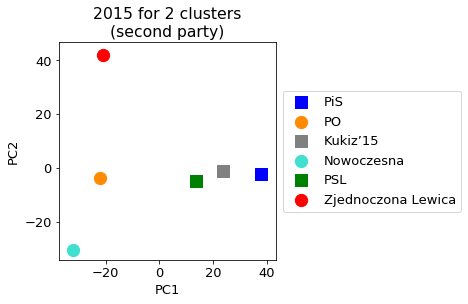

In [6]:
pd_work = pd_list[-6].iloc[:-1,:-3]
pca = PCA(n_components=2)
pca.fit(pd_work)

X_pca=pca.transform(pd_work) 

parties_Kmeans = KMeans(n_clusters=2)
parties_Kmeans = parties_Kmeans.fit(pd_work)

mm = ['o', 's' ,'v']
plt.figure(figsize=(4,4))
plt.rcParams.update({'font.size': 13})

m0 = parties_Kmeans.labels_[ np.where(pd_work.index.values =='PO')[0][0] ]
m1 = parties_Kmeans.labels_[ np.where(pd_work.index.values =='PiS')[0][0] ]

for i in range(pd_work.shape[0]):
    m = mm[parties_Kmeans.labels_[i]]
    
    p = pd_work.index.values.tolist( )[i]
    
    if p == 'PO': c = 'darkorange'
    elif p == 'PiS': c = 'blue'
    elif p == 'Zjednoczona Lewica': c = 'red'
    elif p == 'PSL': c = 'green'
    elif p == "Nowoczesna": c = 'turquoise'
    else: c = 'grey'
        
    if parties_Kmeans.labels_[i] == m0: m='o'
    else: m='s'
        
    plt.scatter(X_pca[i,0],X_pca[i,1], marker=m, c=c, s = 150)

plt.title('2015 for 2 clusters\n(second party)')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(pd_work.index.values.tolist( ), loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('dane_pdf/charaktetyryka_pogladow/images/2015_3_clusters_sp.png', bbox_inches='tight')
plt.axis('square')
plt.savefig('dane_pdf/charaktetyryka_pogladow/images/2015_3_clusters_sp.pdf',  bbox_inches='tight')

# Opinie elektoratu

In [7]:
path = 'dane_pdf/charaktetyryka_pogladow/'
files = list(filter(lambda x: os.path.isfile(path+x), os.listdir(path)))
files.sort()
files = [ f for f in files if "_org" not in f ]
files

['2001_percent.csv',
 '2001_points.csv',
 '2003_percent.csv',
 '2003_points.csv',
 '2005_percent.csv',
 '2005_points.csv',
 '2007_percent.csv',
 '2007_points.csv',
 '2011_percent.csv',
 '2011_points.csv',
 '2015_percent.csv',
 '2015_points.csv',
 '2019_percent.csv',
 '2019_points.csv']

In [8]:
op_list = [(lambda x: pd.read_csv(path+f,index_col=0, header=0).T )(f) for f in files]

In [9]:
years = ['2001','2003','2005','2007','2011','2015','2019']

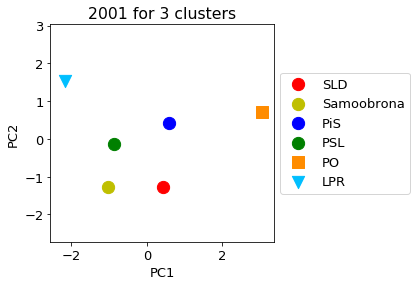

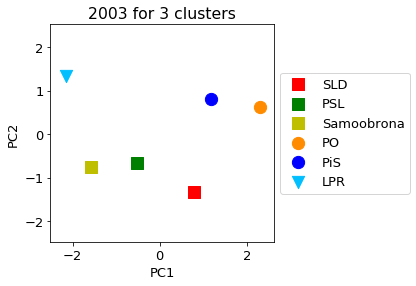

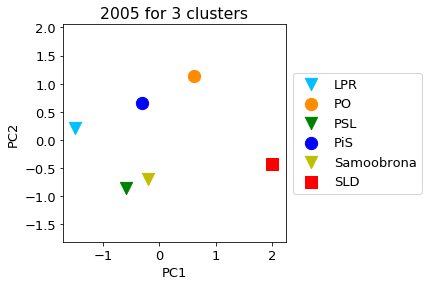

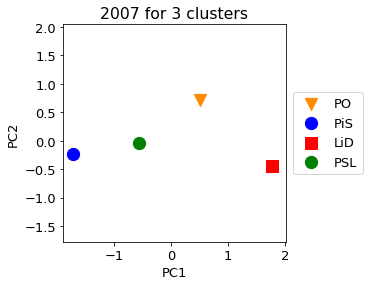

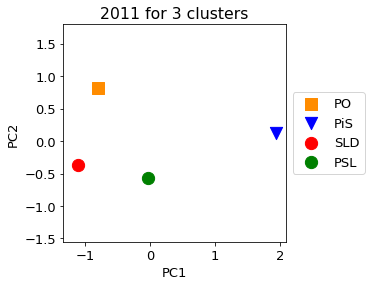

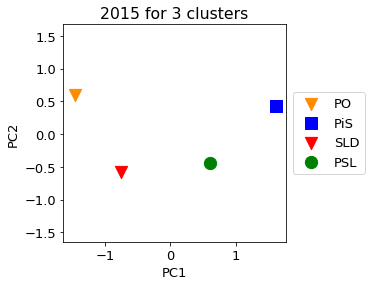

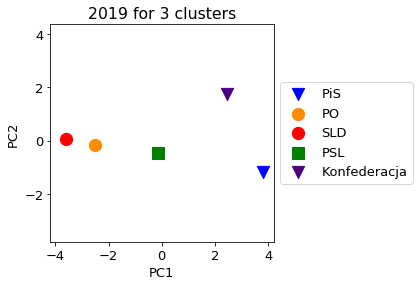

In [10]:
for inx in np.arange(1,len(op_list),2):
    pca = PCA(n_components=3)
    pca.fit(op_list[inx])
    
    X_pca=pca.transform(op_list[inx]) 
    #print('Variance ratio:', pca.explained_variance_ratio_, 'Total var:', np.sum(pca.explained_variance_ratio_[:2]))
    #print('Components ratio:', pca.components_.T)
    
    parties_Kmeans = KMeans(n_clusters=3)
    parties_Kmeans = parties_Kmeans.fit(op_list[inx])
    
    embedding = MDS(n_components=2)
    MDS_parties = embedding.fit_transform(op_list[inx])
    
    mm = ['o', 'v' ,'s']
    plt.figure(figsize=(4,4))
    plt.rcParams.update({'font.size': 13})
    
    for i in range(op_list[inx].shape[0]):
        m = mm[parties_Kmeans.labels_[i]]
        #plt.scatter(MDS_parties[i,1],MDS_parties[i,1], marker=m, s = 150)
        p = op_list[inx].index.values.tolist( )[i]
        
        if p == 'PO': c = 'darkorange'
        elif p == 'PiS': c = 'blue'
        elif p in ['SLD','LiD']: c = 'red'
        elif p == 'PSL': c = 'green'
        elif p == 'LPR': c = 'deepskyblue'
        elif p == 'Samoobrona': c = 'y'
        else: c = 'indigo'
        
        plt.scatter(X_pca[i,0],X_pca[i,1], marker=m, c=c, s = 150)

    #2011 + Palikot
    #2015 Kukiz
    
    plt.title(years[inx//2]+' for 3 clusters')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(op_list[inx].index.values.tolist( ), loc='center left', bbox_to_anchor=(1, 0.5))
    plt.axis('equal')
    plt.savefig('dane_pdf/charaktetyryka_pogladow/images/'+years[inx//2]+'_3_clusters.pdf',  bbox_inches='tight')

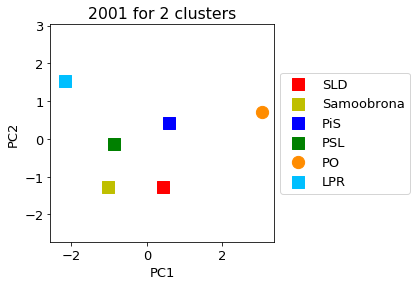

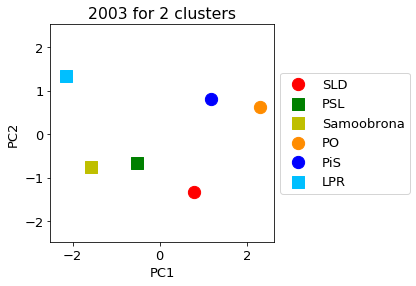

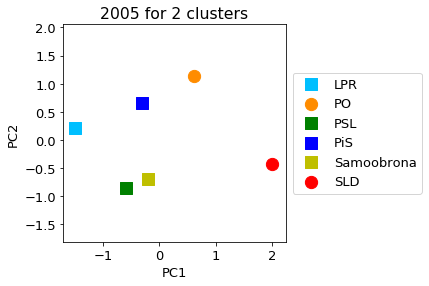

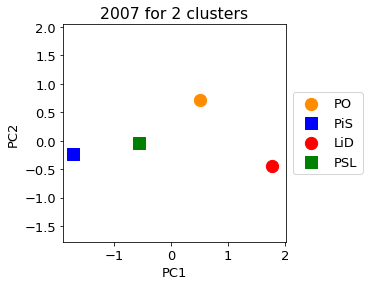

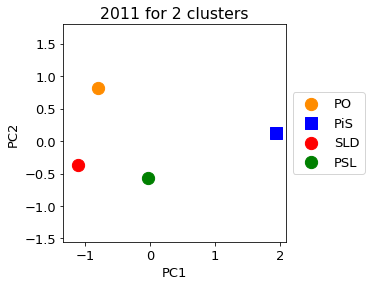

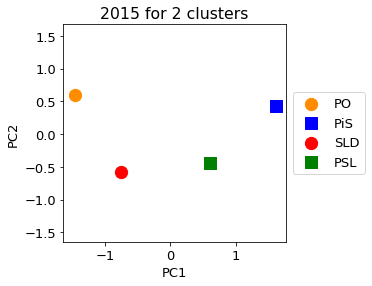

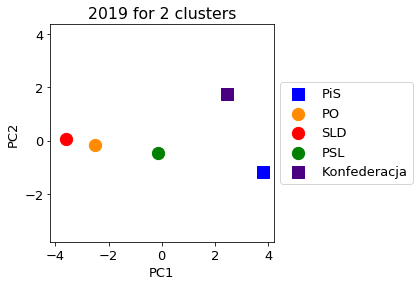

In [11]:
for inx in np.arange(1,len(op_list),2):
    pca = PCA(n_components=3)
    pca.fit(op_list[inx])
    
    X_pca=pca.transform(op_list[inx]) 
    #print('Variance ratio:', pca.explained_variance_ratio_)
    
    parties_Kmeans = KMeans(n_clusters=2)
    parties_Kmeans = parties_Kmeans.fit(op_list[inx])
    
    embedding = MDS(n_components=2)
    MDS_parties = embedding.fit_transform(op_list[inx])
    
    mm = ['o', 'v' ,'s']
    plt.figure(figsize=(4,4))
    plt.rcParams.update({'font.size': 13})
    
    m0 = parties_Kmeans.labels_[ np.where(op_list[inx].index.values =='PO')[0][0] ]
    m1 = parties_Kmeans.labels_[ np.where(op_list[inx].index.values =='PiS')[0][0] ]
    
    for i in range(op_list[inx].shape[0]):
        #m = mm[parties_Kmeans.labels_[i]]
        #plt.scatter(MDS_parties[i,1],MDS_parties[i,1], marker=m, s = 150)
        p = op_list[inx].index.values.tolist( )[i]
        
        if p == 'PO': c = 'darkorange'
        elif p == 'PiS': c = 'blue'
        elif p in ['SLD','LiD']: c = 'red'
        elif p == 'PSL': c = 'green'
        elif p == 'LPR': c = 'deepskyblue'
        elif p == 'Samoobrona': c = 'y'
        else: c = 'indigo'
            
        if parties_Kmeans.labels_[i] == m0: m='o'
        else: m='s'
            
        plt.scatter(X_pca[i,0],X_pca[i,1], marker=m, c=c, s = 150)
    
    plt.title(years[inx//2]+' for 2 clusters')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(op_list[inx].index.values.tolist( ), loc='center left', bbox_to_anchor=(1, 0.5))
    plt.axis('equal')
    plt.savefig('dane_pdf/charaktetyryka_pogladow/images/'+years[inx//2]+'_2_clusters.pdf',  bbox_inches='tight')

## 2015

In [44]:
inx = 7
pca = PCA(n_components=3)
pca.fit(op_list[inx])

df_to_work = op_list[inx].iloc[:-1,:]
df_to_work

Pary przeciwstawnych stwierdzeń,(1) Polska powinna dążyć do jak najściślejszejintegracji w ramach Unii Europejskiej,(1) Państwo powinno zapewnić obywatelomwysoki poziom świadczeń społecznych. takich jakopieka zdrowotna. szkolnictwo itp.,(1) Osoby dużo zarabiające powinny płacić wyższyprocent podatku od swoich dochodów niż ci. którzyzarabiają mało,(1) Z przestępczością należy walczyć twardo.nawet jeśli miałoby to ograniczać prawa i swobodyzwykłych obywateli,(1) Przerywanie ciąży powinno być dozwolonebez żadnych ograniczeń,(1) Konkordat między Polską a Stolicą Apostolskąjest niepotrzebny. Państwo nie powinno wyróżniaćżadnego z wyznań ani Kościołów,(1) Prawo powinno dopuszczać możliwośćzawierania formalnych związków partnerskichprzez osoby tej samej płci,(1) Polska powinna możliwie najszybciej przyjąćeuro,(1) Polska powinna prowadzić aktywną politykęwschodnią i wspierać proeuropejskie dążeniaUkraińców i innych narodów byłego ZSSR,(1) Najważniejsze jest bezpieczeństwo zatrudnieniai ochrona istniejących miejsc pracy. nawet jeślipogarsza się sytuacja ekonomiczna przedsiębiorstw,(1) Należy sprywatyzować wszystkieprzedsiębiorstwa państwowe
PO,3.63,2.05,3.07,4.12,3.94,3.55,4.33,4.83,4.07,4.25,5.11
PiS,4.66,1.75,2.46,3.81,4.95,4.74,5.91,5.96,4.65,3.59,6.07
SLD,3.85,1.66,2.88,3.60,4.05,3.22,4.80,5.02,4.98,4.02,5.66
PSL,4.02,1.77,2.91,3.38,4.37,3.92,5.57,5.99,4.88,3.68,5.74


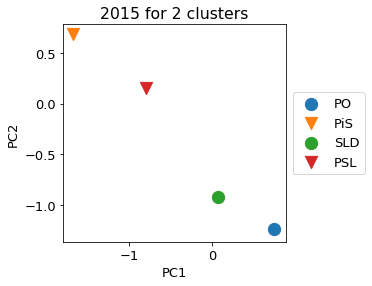

In [45]:
X_pca=pca.transform(op_list[inx]) 
#print('Variance ratio:', pca.explained_variance_ratio_)

parties_Kmeans = KMeans(n_clusters=2)
parties_Kmeans = parties_Kmeans.fit(df_to_work)

embedding = MDS(n_components=2)
MDS_parties = embedding.fit_transform(df_to_work)

mm = ['o', 'v' ,'s']
plt.figure(figsize=(4,4))
plt.rcParams.update({'font.size': 13})

for i in range(df_to_work.shape[0]):
    m = mm[parties_Kmeans.labels_[i]]
    #plt.scatter(MDS_parties[i,1],MDS_parties[i,1], marker=m, s = 150)
    plt.scatter(X_pca[i,0],X_pca[i,1], marker=m, s = 150)

plt.title(years[inx//2]+' for 2 clusters')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(df_to_work.index.values.tolist( ), loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('dane_pdf/charaktetyryka_pogladow/images/'+years[inx//2]+'_2_clusters.png', 
       bbox_inches='tight')

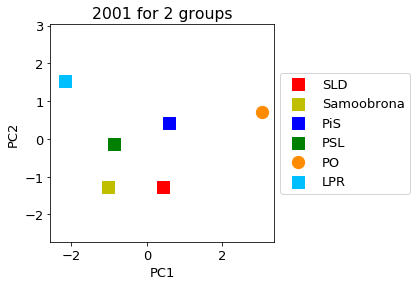

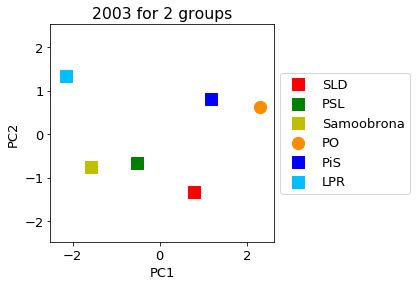

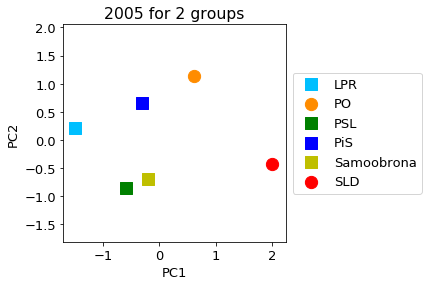

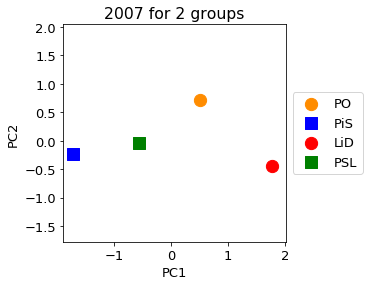

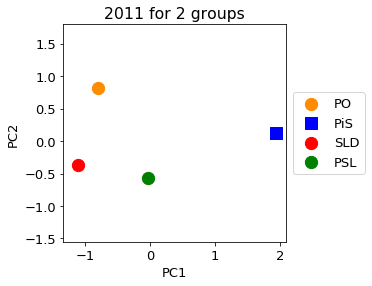

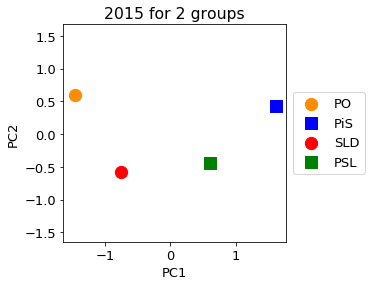

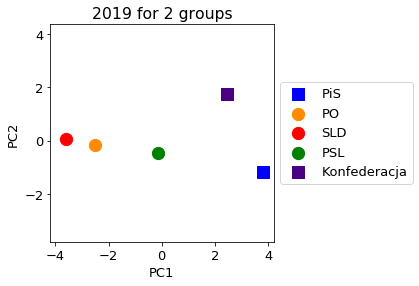

In [12]:
for inx in np.arange(1,len(op_list),2):
    df_process = op_list[inx]
    pca = PCA(n_components=3)
    pca.fit(df_process)
    
    X_pca=pca.transform(df_process) 
    #print('Variance ratio:', pca.explained_variance_ratio_)
    
    c0 = df_process.loc['PO'].values
    c1 = df_process.loc['PiS'].values
    
    mm = ['o', 's']
    plt.figure(figsize=(4,4))
    plt.rcParams.update({'font.size': 13})
    
    for i in range(df_process.shape[0]):
        d0 = np.sum((df_process.iloc[i].values - c0)**2)
        d1 = np.sum((df_process.iloc[i].values - c1)**2)
        if d0 < d1: m = 'o'
        else: m = 's'
        
        p = op_list[inx].index.values.tolist( )[i]
        
        if p == 'PO': c = 'darkorange'
        elif p == 'PiS': c = 'blue'
        elif p in ['SLD','LiD']: c = 'red'
        elif p == 'PSL': c = 'green'
        elif p == 'LPR': c = 'deepskyblue'
        elif p == 'Samoobrona': c = 'y'
        else: c = 'indigo'
            
        #plt.scatter(MDS_parties[i,1],MDS_parties[i,1], marker=m, s = 150)
        plt.scatter(X_pca[i,0],X_pca[i,1], marker=m, color=c, s = 150)
    
    plt.title(years[inx//2]+' for 2 groups')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(df_process.index.values.tolist( ), loc='center left', bbox_to_anchor=(1, 0.5))
    plt.axis('equal')
    plt.savefig('dane_pdf/charaktetyryka_pogladow/images/'+years[inx//2]+'_2_grups.pdf', 
          bbox_inches='tight')

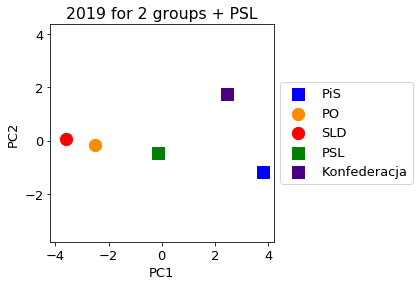

In [13]:

df_process = op_list[-1]
pca = PCA(n_components=3)
pca.fit(df_process)

X_pca=pca.transform(df_process) 
#print('Variance ratio:', pca.explained_variance_ratio_)

c0 = df_process.loc['PO'].values
c1 = df_process.loc['PiS'].values

mm = ['o', 's']
plt.figure(figsize=(4,4))
plt.rcParams.update({'font.size': 13})

for i in range(df_process.shape[0]):
    d0 = np.sum((df_process.iloc[i].values - c0)**2)
    d1 = np.sum((df_process.iloc[i].values - c1)**2)
    if d0 < d1: m = 'o'
    else: m = 's'

    p = op_list[inx].index.values.tolist( )[i]

    if p == 'PO': c = 'darkorange'
    elif p == 'PiS': c = 'blue'
    elif p in ['SLD','LiD']: c = 'red'
    elif p == 'PSL': 
        c = 'green'
        m = 's'
    elif p == 'LPR': c = 'deepskyblue'
    elif p == 'Samoobrona': c = 'y'
    else: c = 'indigo'

    #plt.scatter(MDS_parties[i,1],MDS_parties[i,1], marker=m, s = 150)
    plt.scatter(X_pca[i,0],X_pca[i,1], marker=m, color=c, s = 150)

plt.title(years[inx//2]+' for 2 groups + PSL')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(df_process.index.values.tolist( ), loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.savefig('dane_pdf/charaktetyryka_pogladow/images/'+years[inx//2]+'_2_grups_PSL_repaired.pdf', 
      bbox_inches='tight')